### Step-1 importing neccessary libraries & warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step-2 Loading & Understanding the Dataset

In [3]:
data = pd.read_csv('Leads.csv')

In [4]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#checking the shape of dataframe
data.shape

(9240, 37)

In [6]:
#checking the columns of dataframe
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Step-3 Data Cleaning & Preparation

In [7]:
#checking datatypes & not null value count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#To identify the missing values
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
(4218/9240)*100

45.64935064935065

In [10]:
data['Lead Profile'].unique

<bound method Series.unique of 0               Select
1               Select
2       Potential Lead
3               Select
4               Select
             ...      
9235    Potential Lead
9236    Potential Lead
9237    Potential Lead
9238               NaN
9239    Potential Lead
Name: Lead Profile, Length: 9240, dtype: object>

In [11]:
# Dropping columns with more than 3000 missing values, as imputing large amounts of missing data could lead to bias or skewness

for col in data.columns:
    if data[col].isna().sum() > 3000:
        data.drop(col, axis=1, inplace=True)

In [12]:
data.shape

(9240, 31)

In [13]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
# As city & Country has more than 25% of missing values & City is not an important feature for our analysis so we can drop it 

data.drop((['City','Country']), axis=1, inplace=True)

In [15]:
data.shape

(9240, 29)

In [16]:
data.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

In [17]:
round((data.isnull().sum() / len(data.index) * 100), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
X Education Forums                                0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect I

In [18]:
# Value count of all the columns
for i in data.columns:
  print("The value counts for:",i)
  print(data[i].value_counts(dropna=False))  # Includes null values in the count
  print("="*100)

The value counts for: Prospect ID
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
The value counts for: Lead Number
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
The value counts for: Lead Origin
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Th

In [19]:
data['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [20]:
data['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [21]:
data['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [22]:
#Drop "Lead Profile" & "How did you hear about X Education" - Clearly these two columns have a lot of rows which have the value "Select" which is of no use to the analysis so it's best that we drop them.

In [23]:
data.drop((['Lead Profile','How did you hear about X Education']),axis=1,inplace=True)

In [24]:
round((data.isnull().sum() / len(data.index) * 100), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect ID                                       0.00
Newspaper Article                                 0.00
Magazine  

In [25]:
# Drop these columns as all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.
cols = ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
data.drop(cols,axis=1,inplace=True)

In [26]:
round((data.isnull().sum() / len(data.index) * 100), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

In [27]:
data.shape

(9240, 15)

In [28]:
#we dont have much information/variation in this column that will help in our analysis as most of them are saying "Better Career Prospects" we can drop this column
data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [29]:
data.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [30]:
round((data.isnull().sum() / len(data.index) * 100), 2).sort_values(ascending=False)

What is your current occupation           29.11
Specialization                            15.56
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [31]:
data.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [32]:
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [33]:
#"What is your current occupation" column we will replace the missing value only & not to drop it the entire column 

In [34]:
# Replace null values of the 'What is your current occupation' column with 'Unknown'
data['What is your current occupation'] = data['What is your current occupation'].fillna('Unknown')

In [35]:
data.isnull().sum().sort_values(ascending=False)

Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [36]:
# Replace null values of the 'Specialization' column with 'Unknown'
data['Specialization'] = data['Specialization'].fillna('Unknown')

In [37]:
data.isnull().sum().sort_values(ascending=False)

TotalVisits                               137
Page Views Per Visit                      137
Last Activity                             103
Lead Source                                36
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
Specialization                              0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [38]:
# Now the number of missing/null values present in the columns are quite small we can drop the rows in which these null values are present.
data = data[~pd.isnull(data['TotalVisits'])]

In [39]:
data = data[~pd.isnull(data['Last Activity'])]

In [40]:
data = data[~pd.isnull(data['Page Views Per Visit'])]

In [41]:
data = data[~pd.isnull(data['Lead Source'])]

In [42]:
data.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [43]:
print(len(data.index))
print(len(data.index)/9240)

9074
0.982034632034632


In [44]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [45]:
# variables Prospect ID and Lead Number won't be of any use in the analysis w.r.t target variable (i.e. Converted), so we will drop these two variables.
data.drop((['Prospect ID','Lead Number']),axis=1,inplace=True)

In [46]:
data.shape

(9074, 12)

### Dealing with Categorical Variable

In [47]:
# columns which are of type 'object'
var = data.loc[:, data.dtypes == 'object']
var.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [48]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True, dtype=int)

# Add the results to the original dataframe
data = pd.concat([data, dummy], axis=1)

In [49]:
# Creating dummy variable separately for the variable 'Specialization' as it has the level 'Select' which is of no use so we drop that level by specifying it explicitly
dummy_spl = pd.get_dummies(data['Specialization'], dtype=int)
dummy_spl = dummy_spl.drop(['Select'], axis=1)
data = pd.concat([data, dummy_spl], axis = 1)

In [50]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Do Not 

In [51]:
# Drop the variables for which the dummy variables have been created
data = data.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [52]:
data.shape

(9074, 85)

### Step-4 Train-Test Split

In [53]:
# Import the neccessary library
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [54]:
# Keep all the feature variables in X & target variable in y

X = data.drop('Converted', axis=1)
y = data['Converted']

In [55]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Unknown
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [57]:
# Split the dataset into train-set 70% and test-set 30% and set the random state to 100

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
smote = SMOTE(random_state=100)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [58]:
# Check the shape of the train dataset and the test dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7810, 84)
(2723, 84)
(7810,)
(2723,)


In [59]:
data.shape

(9074, 85)

In [60]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Unknown
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Feature Scaling

In [61]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()

In [63]:
# Scaling the numerical features which have different scales , Applying the scaler on these columns
data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [64]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Unknown
0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.019920,0.296655,0.045455,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.007968,0.674296,0.036364,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.003984,0.134243,0.018182,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0.007968,0.628521,0.018182,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Correlations between variables

In [65]:
data.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Unknown
Converted,1.000000,0.032855,0.359261,0.000260,-0.037481,0.300775,-0.009328,-0.073186,-0.010651,0.029960,...,-0.007621,0.067607,0.011600,0.044953,-0.008391,0.008560,-0.014207,0.020193,-0.008421,-0.243578
TotalVisits,0.032855,1.000000,0.219723,0.511068,0.290347,-0.169742,-0.037808,0.095571,-0.036983,0.106848,...,0.034990,0.023355,0.043954,0.020840,0.037240,0.058073,0.016010,0.062917,0.064095,-0.169194
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350,0.292571,-0.188526,-0.050742,0.140793,-0.050248,0.215390,...,0.023108,0.068158,0.043215,0.062165,0.028783,0.021763,0.003529,0.050945,0.043377,-0.214545
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000,0.484119,-0.268415,-0.056068,0.133118,-0.053735,0.204870,...,0.069476,0.056391,0.065992,0.049289,0.045710,0.025669,0.021059,0.064994,0.113364,-0.272872
Lead Origin_Landing Page Submission,-0.037481,0.290347,0.292571,0.484119,1.000000,-0.282445,-0.062195,0.523695,-0.059438,0.078455,...,0.096576,0.132351,0.100771,0.125445,0.076578,0.056174,0.048271,0.126661,0.111260,-0.436333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rural and Agribusiness,0.008560,0.058073,0.021763,0.025669,0.056174,-0.013476,-0.005187,0.026209,-0.005273,-0.029381,...,-0.012666,-0.028442,-0.013589,-0.021724,-0.009507,1.000000,-0.005992,-0.017931,-0.013589,-0.038968
Services Excellence,-0.014207,0.016010,0.003529,0.021059,0.048271,-0.010609,-0.003832,0.054781,-0.003896,-0.027345,...,-0.009358,-0.021015,-0.010040,-0.016052,-0.007024,-0.005992,1.000000,-0.013249,-0.010040,-0.028792
Supply Chain Management,0.020193,0.062917,0.050945,0.064994,0.126661,-0.023868,-0.001443,0.103825,-0.001795,-0.025199,...,-0.028002,-0.062882,-0.030043,-0.048030,-0.021018,-0.017931,-0.013249,1.000000,-0.030043,-0.086153
Travel and Tourism,-0.008421,0.064095,0.043377,0.113364,0.111260,-0.036415,-0.008691,0.018943,-0.008835,-0.052771,...,-0.021221,-0.047655,-0.022768,-0.036400,-0.015928,-0.013589,-0.010040,-0.030043,1.000000,-0.065291


### Step-5 Model Building

In [66]:
# importing neccessary libraries
from sklearn.linear_model import LogisticRegression

# Creating a LogisticRegression object
logreg = LogisticRegression()

In [67]:
# Import RFE and selecting 15 variables
from sklearn.feature_selection import RFE

rfe = RFE(estimator=logreg, n_features_to_select=15)             
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [68]:
# Looking for selected features by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 53),
 ('Total Time Spent on Website', False, 66),
 ('Page Views Per Visit', False, 52),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Add Form', False, 14),
 ('Lead Origin_Lead Import', False, 20),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 58),
 ('Lead Source_NC_EDM', False, 33),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 22),
 ('Lead Source_Press_Release', False, 55),
 ('Lead Source_Reference', False, 49),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 56),
 ('Lead Source_WeLearn', False, 70),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 69),
 ('Lead Source_blog', False, 29),
 ('Lead Source_google', False, 18),
 ('Lead Source_testone', False, 23),
 ('Lead Source_welearnblog_Home', False, 30),
 ('

In [69]:
# Keeping all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [70]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [71]:
import statsmodels.api as sm

In [72]:
# Fitting a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7810
Model:                            GLM   Df Residuals:                     7794
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3491.1
Date:                Tue, 22 Oct 2024   Deviance:                       6982.2
Time:                        19:38:44   Pearson chi2:                 7.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3888
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             5.9905      0.229     26.175      0.000       5.542       6.439
Lead Source_Direct Traffic                       -3.3016      0.180    -18.386      0.000      -3.654      -2.950
Lead Source_Facebook                             -3.3859      0.448     -7.562      0.000      -4.263      -2.508
Lead Source_Google                               -2.8194      0.178    -15.880      0.000      -3.167      -2.471
Lead Source_Olark Chat                           -2.7411      0.184    -14.934      0.000      -3.101      -2.381
Lead Source_Organic Search                       -3.1391      0.189    -16.579      0.000      -3.510      -2.768
Lead Source_Referral Sites                       -3.5135      0.341    -10.301      0.000      -4.182      -2.845
Lead Source_Welingak Website                      1.6961      0.738      2.299      0.021       0.250       3.142
Do Not Email_Yes                                 -1.5121      0.160     -9.476      0.000      -1.825      -1.199
What is your current occupation_Student          -3.0554      0.250    -12.215      0.000      -3.546      -2.565
What is your current occupation_Unemployed       -2.6678      0.159    -16.770      0.000      -2.980      -2.356
What is your current occupation_Unknown          -4.0664      0.170    -23.898      0.000      -4.400      -3.733
Last Notable Activity_Email Link Clicked         -1.2010      0.238     -5.049      0.000      -1.667      -0.735
Last Notable Activity_Modified                   -1.3861      0.068    -20.359      0.000      -1.520      -1.253
Last Notable Activity_Olark Chat Conversation    -1.7188      0.289     -5.944      0.000      -2.286      -1.152
Last Notable Activity_Page Visited on Website    -0.9681      0.177     -5.458      0.000      -1.316      -0.620
=================================================================================================================
"""

In [73]:
### Observation p-value -  p-value looks descent less than 0.05 for all variables. Lets look at VIFs now .

In [74]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,4.02
10,What is your current occupation_Unknown,2.82
2,Lead Source_Google,2.53
0,Lead Source_Direct Traffic,2.33
3,Lead Source_Olark Chat,2.23
12,Last Notable Activity_Modified,1.66
4,Lead Source_Organic Search,1.59
6,Lead Source_Welingak Website,1.13
7,Do Not Email_Yes,1.13
8,What is your current occupation_Student,1.11


In [76]:
### observation VIF - 
# VIFs seems to be in a decent range for all the variable as well 


In [77]:
# VIF & P-value seems descent enough for all the values where p-value is less than 0.05 & VIF is less than 5 proceed for Model Evaluation

### Step-6 Model Evaluation

In [78]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

0    0.201403
1    0.764373
2    0.309071
3    0.201403
4    0.203428
5    0.623216
6    0.289998
7    0.623216
8    0.505266
9    0.203428
dtype: float64

In [79]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20140309, 0.76437306, 0.30907073, 0.20140309, 0.20342785,
       0.62321589, 0.28999816, 0.62321589, 0.50526621, 0.20342785])

### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [80]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.201403
1,0,0.764373
2,0,0.309071
3,1,0.201403
4,1,0.203428


### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [81]:
# Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.201403,0
1,0,0.764373,1
2,0,0.309071,0
3,1,0.201403,0
4,1,0.203428,0


In [82]:
# Import metrics from sklearn for evaluation

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2819 1086]
 [ 737 3168]]


In [84]:
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted']))

0.7665813060179257


In [85]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Calculate the sensitivity

TP/(TP+FN)

0.8112676056338028

In [87]:
# Calculate the specificity

TN/(TN+FP)

0.7218950064020486

In [88]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2781049935979513


In [89]:
# positive predictive value
print (TP / float(TP+FP))

0.7447108603667136


In [90]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7927446569178853


In [91]:
#With the current cut off as 0.5 we have around 76.6% accuracy with 81% sensitivity & 72% specificity.But in order to get good results, we need to optimise the threshold.

### Finding the Optimal Cutoff

In [92]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [93]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

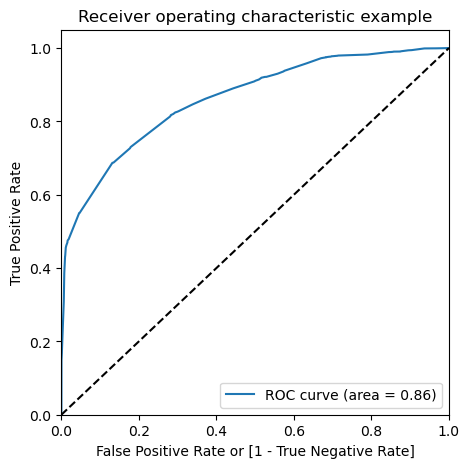

In [94]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [95]:
#The area under the curve of the ROC is 0.86 is quite good. 
#So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [96]:
# Let's create columns with different probability cutoffs 

num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.201403,0,1,1,1,0,0,0,0,0,0,0
1,0,0.764373,1,1,1,1,1,1,1,1,1,0,0
2,0,0.309071,0,1,1,1,1,0,0,0,0,0,0
3,1,0.201403,0,1,1,1,0,0,0,0,0,0,0
4,1,0.203428,0,1,1,1,0,0,0,0,0,0,0


In [97]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.632778  0.979513  0.286044
0.2   0.2  0.651601  0.971831  0.331370
0.3   0.3  0.745327  0.861716  0.628937
0.4   0.4  0.765941  0.820230  0.711652
0.5   0.5  0.766581  0.811268  0.721895
0.6   0.6  0.777721  0.686812  0.868630
0.7   0.7  0.729962  0.478617  0.981306
0.8   0.8  0.729193  0.474520  0.983867
0.9   0.9  0.711396  0.432522  0.990269


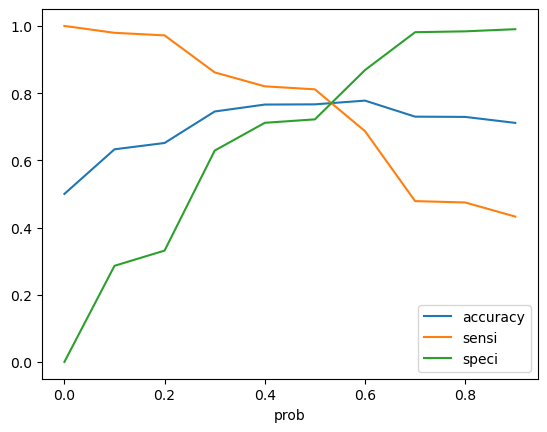

In [98]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [99]:
#As we can see that around 0.44, we get the optimal values of the three metrics. So let's choose 0.44 as our cutoff now.

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.201403,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.764373,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0.309071,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.201403,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.203428,0,1,1,1,0,0,0,0,0,0,0,0


In [100]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7673495518565941

In [101]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2819 1086]
 [ 737 3168]]


In [102]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [103]:
# Calculate Sensitivity

TP/(TP+FN)

0.8112676056338028

In [104]:
# Calculate Specificity

TN/(TN+FP)

0.7218950064020486

In [105]:
# Calculate false positive rate
print(FP/ float(TN+FP))

0.2781049935979513


In [106]:
# Positive predictive value
print (TP / float(TP+FP))
     

0.7447108603667136


In [107]:
# Negative predictive value
print (TN / float(TN+ FN))
     

0.7927446569178853


In [108]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7673495518565941

In [109]:
# we have 76.7% accuracy with 81% sensitivity & 72% specificity model looks good 

### Step-7 Making Predictions on the Test Set

In [110]:
# Scale the test set as well using just 'transform'


X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]) 

In [111]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1490,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7936,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4216,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3830,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [112]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [113]:
# Check X_test_sm

X_test_sm

,const,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1490,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7936,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4216,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3830,1.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
2879,1.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
6501,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7155,1.0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [114]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [115]:
y_test_pred[:10]

3271    0.289998
1490    0.936368
7936    0.289998
4216    0.824768
3830    0.228811
1800    0.959730
6507    0.623216
4821    0.505266
4223    0.965198
4714    0.099474
dtype: float64

In [116]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [117]:
# Let's see the head

y_pred_1.head()

,0
3271,0.289998
1490,0.936368
7936,0.289998
4216,0.824768
3830,0.228811


In [118]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [119]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [120]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [121]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.289998
1,1,0.936368
2,0,0.289998
3,1,0.824768
4,0,0.228811


In [122]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [123]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.289998
1,1,0.936368
2,0,0.289998
3,1,0.824768
4,0,0.228811


In [124]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [125]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.289998,0
1,1,0.936368,1
2,0,0.289998,0
3,1,0.824768,1
4,0,0.228811,0


In [126]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7194271024605214

In [127]:
# accuracy is 71% 

In [128]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1234,  500],
       [ 264,  725]], dtype=int64)

In [129]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [130]:
# Calculate sensitivity
TP / float(TP+FN)

0.7330637007077856

In [131]:
# Calculate specificity
TN / float(TN+FP)

0.7116493656286044

In [132]:
# accuracy is 71% with 73% sensitivity & 71% specificity

### Precision-Recall View

In [133]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2819, 1086],
       [ 737, 3168]], dtype=int64)

###### Precision
###### TP / TP + FP

In [134]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7447108603667136

###### Recall
###### TP / TP + FN

In [135]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8112676056338028

### Precision & recall tradeoff

In [136]:
from sklearn.metrics import precision_recall_curve

In [137]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 7805    1
 7806    1
 7807    1
 7808    1
 7809    1
 Name: Converted, Length: 7810, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 7805    1
 7806    1
 7807    1
 7808    1
 7809    1
 Name: Predicted, Length: 7810, dtype: int64)

In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

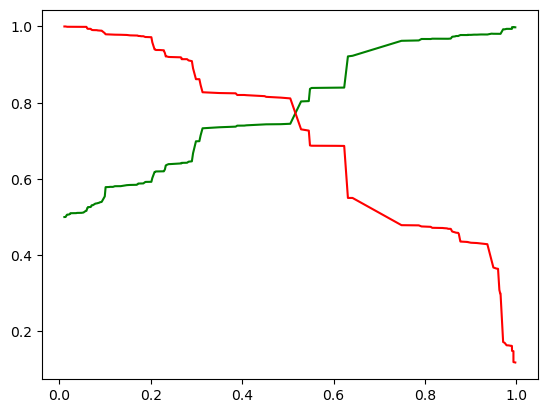

In [139]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [140]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.47 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.201403,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.764373,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0.309071,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.201403,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.203428,0,1,1,1,0,0,0,0,0,0,0,0


In [141]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7664532650448144

In [142]:
# accuracy is 76% now

In [143]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2810, 1095],
       [ 729, 3176]], dtype=int64)

In [144]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Calculate Precision

TP/(TP+FP)

0.7436197611800515

In [146]:
# Calculate Recall

TP/(TP+FN)

0.8133162612035851

### Step-9: Making Final Predictions on the Test Set

In [147]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [148]:
y_test_pred[:10]

3271    0.289998
1490    0.936368
7936    0.289998
4216    0.824768
3830    0.228811
1800    0.959730
6507    0.623216
4821    0.505266
4223    0.965198
4714    0.099474
dtype: float64

In [149]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [150]:
# Let's see the head

y_pred_1.head()

,0
3271,0.289998
1490,0.936368
7936,0.289998
4216,0.824768
3830,0.228811


In [151]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [152]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [153]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [154]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.289998
1,1,0.936368
2,0,0.289998
3,1,0.824768
4,0,0.228811


In [155]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [156]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.289998
1,1,0.936368
2,0,0.289998
3,1,0.824768
4,0,0.228811


In [157]:
# Make predictions on the test set using 0.46 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.46 else 0)

In [158]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.289998,0
1,1,0.936368,1
2,0,0.289998,0
3,1,0.824768,1
4,0,0.228811,0


In [159]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7208960705104664

In [160]:
#accuracy is 72% now

In [161]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1243,  491],
       [ 269,  720]], dtype=int64)

In [162]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [163]:
# Calculate Precision

TP/(TP+FP)

0.5945499587118084

In [164]:
# Calculate Recall

TP/(TP+FN)

0.7280080889787665

#### Key observations:
- Total Time Spent on Website: Has the strongest positive impact on lead conversion. Leads that spend more time on the website are more likely to convert, highlighting the importance of website engagement.
- What is your Current Occupation_Working Professional- Is a significant positive predictor. Working professionals tend to have a higher probability of converting into paying customers.
- Lead Origin_Lead Add Form: Shows a strong positive influence. Leads generated through forms added to the website have a higher chances of
  conversion.